In [39]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

In [40]:
mglearn.plots.plot_kmeans_algorithm()

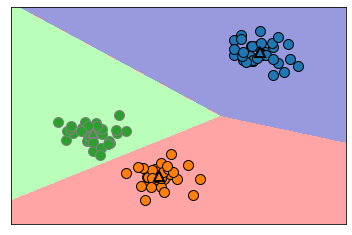

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
x, y = make_blobs(random_state=1)

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [6]:
print("\nCluster labels {}".format(kmeans.labels_))

## During the fitting of data in KMeans, the clustering takes place and each x value is assigned a label. Here, we asked for 3 labels so we got the labels as 0, 1 and 2.


Cluster labels [0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [7]:
# print(kmeans.predict(x))

## predict() method is used to assign cluster labels to new points (for testing purposes). Here, since the labels_ and predict(x) give the same result.

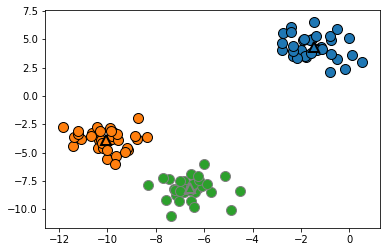

In [8]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                        kmeans.cluster_centers_[:, 1], [0, 1, 2],
                        markers='^', markeredgewidth=2)

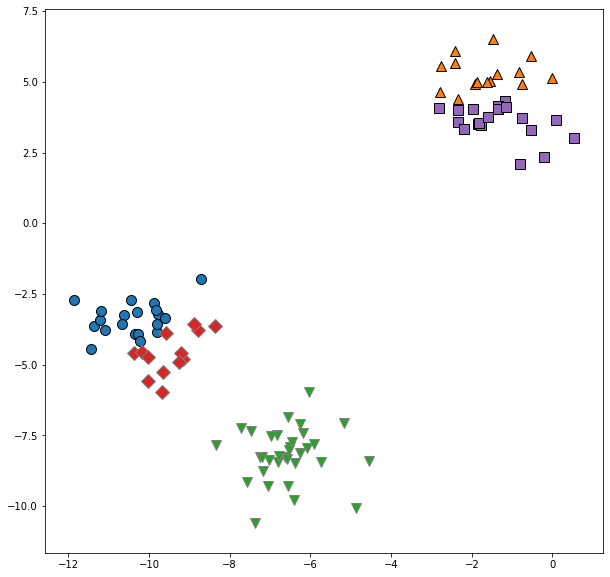

In [9]:
# Using 5 cluster centres

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
assignments = kmeans.labels_

mglearn.discrete_scatter(x[:, 0], x[:, 1], assignments, ax=axes)

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


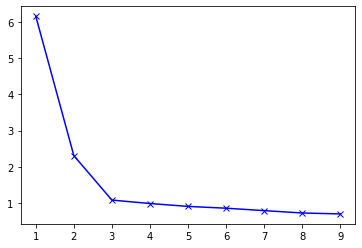

In [10]:
K = range(1, 10)
distortions = []

for k in K:
    kmodel = KMeans(n_clusters=k).fit(x)
    kmodel.fit(x)
    
    distortions.append(sum(np.min(cdist(x, kmodel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
plt.plot(K, distortions, 'bx-')
plt.show()

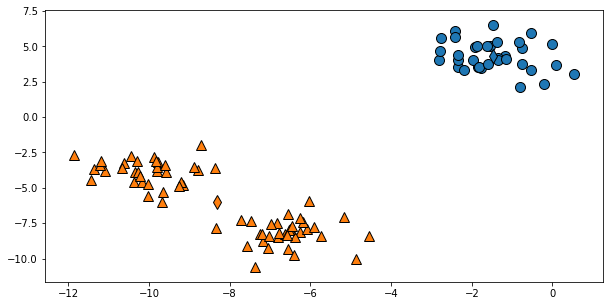

In [11]:
# Using 2 cluster centers 

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
assignments = kmeans.labels_

mglearn.discrete_scatter(x[:, 0], x[:, 1], assignments, ax=axes)
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1], markers='d')